# HW3 - Q3 Xianghui Gu (xgu72, 903248583)

In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

/Users/xianghui/Desktop/cse6240/cse6240/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 0. Get label data

In [17]:
randseed = 0

In [165]:
# import label
label_df = pd.read_csv('label.csv', sep=',')

In [26]:
labels = np.ravel(label_df.as_matrix())

### 1. Method 1: Word2Vec using training dataset

- Method 2,3,4 uses the same template as 1.

- read X1

In [30]:
X1 = pd.read_csv('X1.out', sep = ',', names = list(range(0,10))).as_matrix()

- split train:test = 4:1

In [32]:
X1_train, X1_cv, y1_train, y1_cv = train_test_split(X1, labels, test_size = 0.2, random_state = randseed)

- thoughout all the methods, we consistently set the number of trees as 100.

In [107]:
# Fit a random forest to the training data, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 )

- fit the tree and predict the probability of being "sentiment 1"

In [108]:
# Fitting the forest may take a few minutes
print ("Fitting a random forest to labeled training data...")
forest = forest.fit(X1_train,y1_train)
y1_pred = forest.predict_proba(X1_cv)[:,1]

Fitting a random forest to labeled training data...


- get fpr (false positive), tpr (true positive), auc (area under curve) from the real tag vs prediction

In [120]:
from sklearn.metrics import roc_curve, auc

In [106]:
# Compute ROC curve and ROC area for each class
fpr1, tpr1, _ = roc_curve(y1_cv, y1_pred)

In [121]:
roc_auc1 = auc(fpr1, tpr1)

### 2. Method 2: Word2Vec using google dataset

In [81]:
X2 = pd.read_csv('X2.out', sep = ',', names = list(range(0,10))).as_matrix()
X2_train, X2_cv, y2_train, y2_cv = train_test_split(X2, labels, test_size = 0.2, random_state = randseed)

In [111]:
forest = RandomForestClassifier( n_estimators = 100 )
print ("Fitting a random forest to labeled training data...")
forest = forest.fit(X2_train,y2_train)
y2_pred = forest.predict_proba(X2_cv)[:,1]

Fitting a random forest to labeled training data...


In [112]:
fpr2, tpr2, _ = roc_curve(y2_cv, y2_pred)

In [123]:
roc_auc2 = auc(fpr2, tpr2)

### 3. Method 3: LDA with 10 topics

In [80]:
X3 = pd.read_csv('X3.out', sep = ',', names = list(range(0,10))).as_matrix()
X3_train, X3_cv, y3_train, y3_cv = train_test_split(X3, labels, test_size = 0.2, random_state = randseed)

In [114]:
forest = RandomForestClassifier( n_estimators = 100 )
print ("Fitting a random forest to labeled training data...")
forest = forest.fit(X3_train,y3_train)
y3_pred = forest.predict_proba(X3_cv)[:,1]

Fitting a random forest to labeled training data...


In [115]:
fpr3, tpr3, _ = roc_curve(y3_cv, y3_pred)

In [125]:
roc_auc3 = auc(fpr3, tpr3)

### 4. Method 4: LDA with 20 topics

In [156]:
X4 = pd.read_csv('X4.out', sep = ',', names = list(range(0,20))).as_matrix()
X4_train, X4_cv, y4_train, y4_cv = train_test_split(X4, labels, test_size = 0.2, random_state = randseed)

In [157]:
forest = RandomForestClassifier( n_estimators = 100 )
print ("Fitting a random forest to labeled training data...")
forest = forest.fit(X4_train,y4_train)
y4_pred = forest.predict_proba(X4_cv)[:,1]

Fitting a random forest to labeled training data...


In [158]:
fpr4, tpr4, _ = roc_curve(y4_cv, y4_pred)

In [159]:
roc_auc4 = auc(fpr4, tpr4)

### 5. ROC plot for four methods

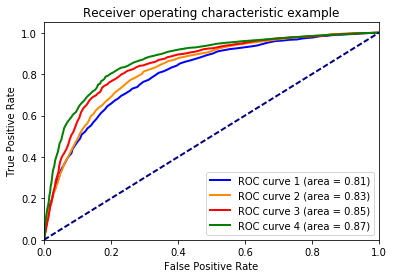

In [160]:
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='blue',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='red',
         lw=lw, label='ROC curve 3 (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='green',
         lw=lw, label='ROC curve 4 (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 6. Kaggle Score

- We use the following template to generate submission files for four methods.

In [161]:
test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )

In [162]:
X_test = pd.read_csv('X4_test.out', sep = ',', names = list(range(0,20))).as_matrix()

In [163]:
forest_final = RandomForestClassifier( n_estimators = 100 )
print ("Fitting a random forest to labeled training data...")
forest_final = forest_final.fit(X4, labels)
result = forest_final.predict(X_test)

Fitting a random forest to labeled training data...


In [164]:
# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "X4_pred.csv", index=False, quoting=3 )

- Kaggle

X1: 0.72528

X2: 0.74584

X3: 0.76696

X4: 0.78756

- Kaggle score of variants of Bag of Words in Hw1 : (0.78,0.88)

### 7. Discussion

7.1 Among four methods:
    
LDA performs better than Word2Vec.

LDA with more topics (reasonable number of topics) perform better.

In Word2Vec, google dataset has a better performance than the training dataset.

7.2 Their Kaggle scores are all lower than the bag-of-words approaches in HW1.

7.3 Three things to do:
    - tune the parameters in the random forest
    - consider stemming of words in Word2Vec
    - try larger number of topics

Appendix: kaggle score

![alt text](kaggle_score_xianghui_gu.png)